In [1]:
import pandas as pd
import matplotlib.pyplot as plt

###Employee Analysis
Siapa dan title employee yang banyak berurusan dengan order

In [7]:
df1 = pd.read_csv('/content/employeetitleandorders.csv')
df1['FullName'] = df1.FirstName + ' ' + df1.LastName
df1

,FirstName,LastName,Title,OrderID,FullName
0,Nancy,Davolio,Sales Representative,10258,Nancy Davolio
1,Nancy,Davolio,Sales Representative,10270,Nancy Davolio
2,Nancy,Davolio,Sales Representative,10275,Nancy Davolio
3,Nancy,Davolio,Sales Representative,10285,Nancy Davolio
4,Nancy,Davolio,Sales Representative,10292,Nancy Davolio
...,...,...,...,...,...
825,Anne,Dodsworth,Sales Representative,10978,Anne Dodsworth
826,Anne,Dodsworth,Sales Representative,11016,Anne Dodsworth
827,Anne,Dodsworth,Sales Representative,11017,Anne Dodsworth
828,Anne,Dodsworth,Sales Representative,11022,Anne Dodsworth


In [10]:
df1.groupby('FullName').count()

,FirstName,LastName,Title,OrderID
FullName,,,,
Andrew Fuller,96,96,96,96
Anne Dodsworth,43,43,43,43
Janet Leverling,127,127,127,127
Laura Callahan,104,104,104,104
Margaret Peacock,156,156,156,156
Michael Suyama,67,67,67,67
Nancy Davolio,123,123,123,123
Robert King,72,72,72,72
Steven Buchanan,42,42,42,42


In [11]:
df1.groupby('Title').count()

,FirstName,LastName,OrderID,FullName
Title,,,,
Inside Sales Coordinator,104,104,104,104
Sales Manager,42,42,42,42
Sales Representative,588,588,588,588
"Vice President, Sales",96,96,96,96


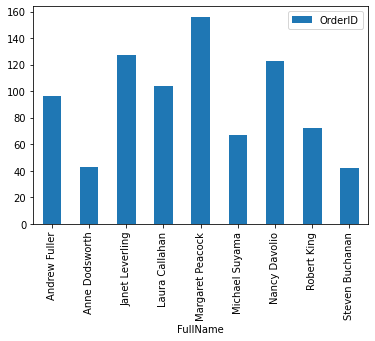

In [15]:
df1.groupby('FullName')[['OrderID']].count().plot(kind='bar')

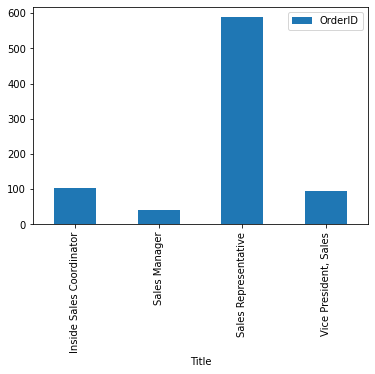

In [16]:
df1.groupby('Title')[['OrderID']].count().plot(kind='bar')

###	Shipper Analysis
Orderan paling banyak dikirim ke kota mana, dengan shipper apa.

In [22]:
df2 = pd.read_csv('/content/shipperandcity.csv')
df2

,CompanyName,ShipCity
0,Federal Shipping,Reims
1,Speedy Express,Münster
2,United Package,Rio de Janeiro
3,Speedy Express,Lyon
4,United Package,Charleroi
...,...,...
825,United Package,México D.F.
826,United Package,Kobenhavn
827,United Package,Genève
828,United Package,Marseille


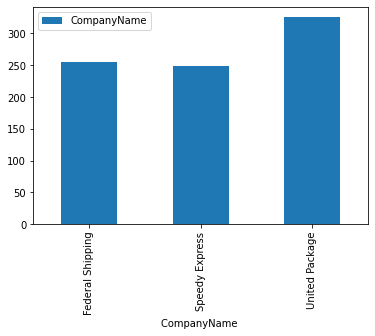

In [38]:
df2.groupby('CompanyName ').count().rename(columns={'ShipCity': 'CompanyName'}).plot(kind='bar')

In [46]:
df2.groupby('CompanyName ').count().rename(columns={'ShipCity': 'CompanyName'})

,CompanyName
CompanyName,
Federal Shipping,255
Speedy Express,249
United Package,326


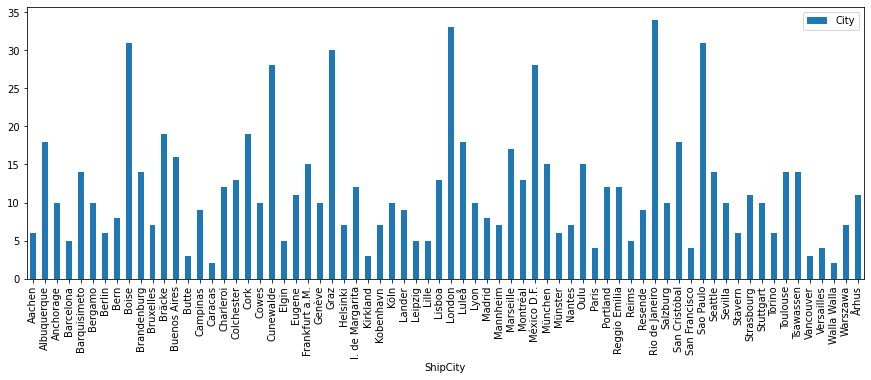

In [36]:
df2.groupby('ShipCity').count().rename(columns={'CompanyName ': 'City'}).plot(kind='bar', figsize=(15, 5))

In [45]:
df3 = df2.groupby('ShipCity').count().reset_index().rename(columns={'ShipCity': 'City', 'CompanyName ': 'Order'})
df3

,City,Order
0,Aachen,6
1,Albuquerque,18
2,Anchorage,10
3,Barcelona,5
4,Barquisimeto,14
...,...,...
65,Vancouver,3
66,Versailles,4
67,Walla Walla,2
68,Warszawa,7


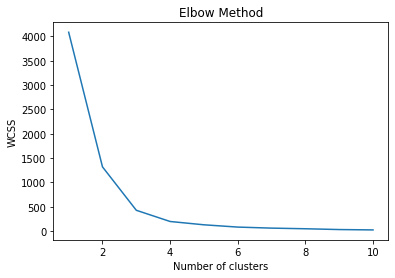

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df3.Order.values.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df3.Order.values.reshape(-1, 1))
df3['cluster'] = kmeans.predict(df3.Order.values.reshape(-1, 1))
df3

,City,Order,cluster
0,Aachen,6,0
1,Albuquerque,18,1
2,Anchorage,10,0
3,Barcelona,5,0
4,Barquisimeto,14,1
...,...,...,...
65,Vancouver,3,0
66,Versailles,4,0
67,Walla Walla,2,0
68,Warszawa,7,0


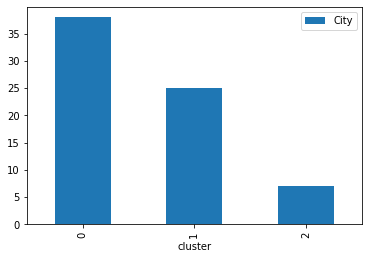

In [56]:
df3.groupby('cluster')[['City']].count().plot(kind='bar')

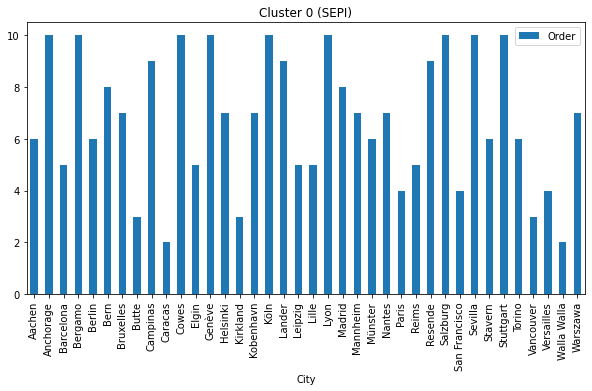

In [72]:
df3.loc[df3.cluster == 0][['City', 'Order']].plot(kind='bar', x='City', figsize=(10, 5), title='Cluster 0 (SEPI)')

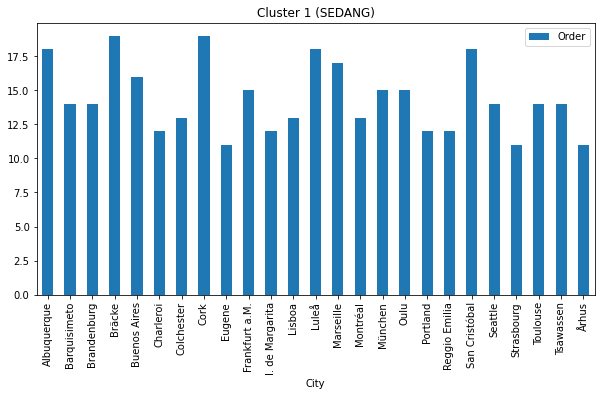

In [71]:
df3.loc[df3.cluster == 1][['City', 'Order']].plot(kind='bar', x='City', figsize=(10, 5), title='Cluster 1 (SEDANG)')

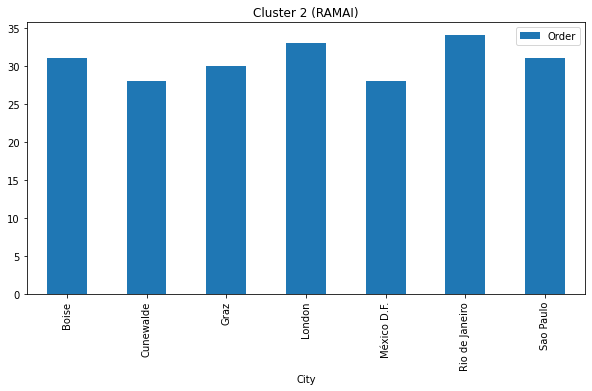

In [70]:
df3.loc[df3.cluster == 2][['City', 'Order']].plot(kind='bar', x='City', figsize=(10, 5), title='Cluster 2 (RAMAI)')